# Assignment Statement: Build the Image classification model by dividing the model into following 4 stages: 
a. Loading and preprocessing the image data 
b. Defining the model’s architecture 
c. Training the model 
d. Estimating the model’s performance 


#import Neccessary Libraries 

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#Load the dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each: 
airplane										
automobile										
bird										
cat										
deer										
dog										
frog										
horse										
ship										
truck

In [2]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)   #2D array can be reshaped into 1D array using reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(x, y, index):
    plt.figure(figsize = (20,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

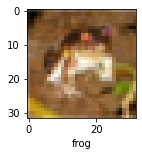

In [11]:
plot_sample(x_train, y_train, 0)

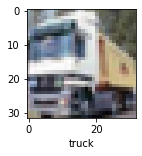

In [12]:
plot_sample(x_train, y_train, 1)

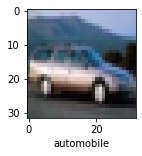

In [13]:
plot_sample(x_train, y_train, 4)

#Normalizing the training data

In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [15]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

#Build simple artificial neural network for image classification

In [16]:
#Define network architecture of your model
annmodel = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(1000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

In [17]:
#compile model using optimizer
annmodel.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
annmodel.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.8375 - accuracy: 0.3467
Epoch 2/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.6525 - accuracy: 0.4149
Epoch 3/5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5678 - accuracy: 0.4489
Epoch 4/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5129 - accuracy: 0.4658
Epoch 5/5
1563/1563 [==============================] - 46s 29ms/step - loss: 1.4632 - accuracy: 0.4845


You can see that at the end of 5 epochs, accuracy is at around 48% using ANN.

Now we build a convolutional neural network to train our images

In [19]:
#define cnn network architecture 
cnnmodel = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
cnnmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history=cnnmodel.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.4892 - accuracy: 0.4628 - val_loss: 1.2226 - val_accuracy: 0.5710
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1554 - accuracy: 0.5923 - val_loss: 1.1007 - val_accuracy: 0.6167
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0237 - accuracy: 0.6427 - val_loss: 1.0319 - val_accuracy: 0.6427
Epoch 4/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9406 - accuracy: 0.6735 - val_loss: 0.9574 - val_accuracy: 0.6717
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8794 - accuracy: 0.6968 - val_loss: 0.9193 - val_accuracy: 0.6857
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8321 - accuracy: 0.7119 - val_loss: 0.9556 - val_accuracy: 0.6750
Epoch 7/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7856 - accuracy: 0.7283 - val_loss: 0.9329 -

In [22]:
cnnmodel.evaluate(x_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.9066 - accuracy: 0.6948


[0.9066118001937866, 0.6948000192642212]

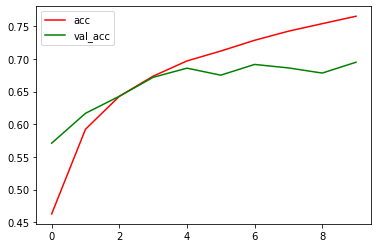

In [23]:
plt.plot(history.history['accuracy'],label='acc', color='red')
plt.plot(history.history['val_accuracy'],label='val_acc', color='green')
plt.legend()

In [24]:
y_pred = cnnmodel.predict(x_test)
y_pred[:5]

313/313 [==============================] - 4s 13ms/step


array([[1.2815497e-03, 4.2702663e-03, 7.5934883e-03, 9.2037982e-01,
        5.9811946e-04, 3.1952742e-02, 9.2844144e-03, 7.4512203e-04,
        2.3590399e-02, 3.0420753e-04],
       [4.3690767e-02, 1.3436833e-01, 6.4636784e-05, 1.3327898e-05,
        1.5749193e-06, 3.1231913e-08, 7.5460161e-07, 1.3259103e-06,
        8.1574404e-01, 6.1152130e-03],
       [6.3460015e-02, 4.8394346e-01, 1.5958943e-03, 3.9128992e-03,
        2.6420450e-03, 3.1229397e-04, 1.3328361e-03, 6.4348653e-03,
        3.0087963e-01, 1.3548601e-01],
       [7.2229838e-01, 2.3643094e-01, 1.8206224e-02, 1.3526198e-03,
        7.2351722e-03, 1.8142782e-05, 1.0549098e-03, 7.2373910e-04,
        1.2635283e-02, 4.4587654e-05],
       [2.7101999e-06, 1.0686508e-05, 2.1702798e-02, 3.1526554e-02,
        3.1527743e-01, 8.0031082e-03, 6.2335610e-01, 5.7827932e-05,
        5.8798727e-05, 3.9077563e-06]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [26]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

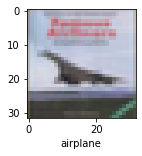

In [27]:
plot_sample(x_test, y_test,3)

In [28]:
classes[y_classes[3]]

'airplane'

In [29]:
cnnmodel.save('cnnmodel.h5')

Conclusion:  With CNN, at the end of 10 epochs, training accuracy was at around 91% which is a significant improvement over ANN. CNN's are best for image classification and gives good accuracy. Also computation is much less compared to ANN as maxpooling reduces the image dimensions while still preserving the features